In [10]:
import pyfredapi as pf
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt
import pandas as pd
import json

api_key = os.environ.get("api_key")

rgdp_data = pf.get_series(series_id="A191RL1Q225SBEA", api_key=api_key)

print(rgdp_data)

rgdp_info = pf.get_series_info(series_id="A191RL1Q225SBEA", api_key=api_key)

    realtime_start realtime_end       date  value
0       2023-05-13   2023-05-13 1947-04-01   -1.1
1       2023-05-13   2023-05-13 1947-07-01   -0.8
2       2023-05-13   2023-05-13 1947-10-01    6.4
3       2023-05-13   2023-05-13 1948-01-01    6.2
4       2023-05-13   2023-05-13 1948-04-01    6.8
..             ...          ...        ...    ...
299     2023-05-13   2023-05-13 2022-01-01   -1.6
300     2023-05-13   2023-05-13 2022-04-01   -0.6
301     2023-05-13   2023-05-13 2022-07-01    3.2
302     2023-05-13   2023-05-13 2022-10-01    2.6
303     2023-05-13   2023-05-13 2023-01-01    1.1

[304 rows x 4 columns]


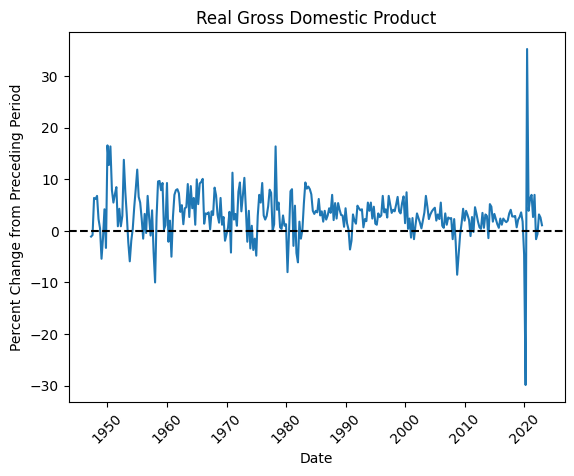

In [11]:
# Convert the "date" column to datetime format
rgdp_data['date'] = pd.to_datetime(rgdp_data['date'])

# Plot the graph
plt.plot(rgdp_data['date'], rgdp_data['value'])
plt.xlabel('Date')
plt.ylabel(rgdp_info.units)
plt.title(rgdp_info.title)
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

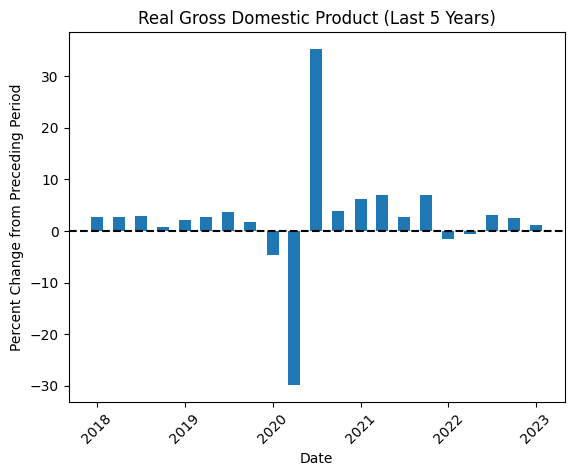

In [22]:
# Convert the "date" column to datetime format
rgdp_data['date'] = pd.to_datetime(rgdp_data['date'])

# Filter the DataFrame for the last 5 years
last_5_years_data = rgdp_data[rgdp_data['date'] >= rgdp_data['date'].max() - pd.DateOffset(years=5)]

# Plot the bar chart with data from the last 5 years
bar_width = 50
plt.bar(last_5_years_data['date'], last_5_years_data['value'], width=bar_width)
plt.xlabel('Date')
plt.ylabel(rgdp_info.units)
plt.title(rgdp_info.title + ' (Last 5 Years)')
plt.xticks(rotation=45)

# Add a dashed line at y=0
plt.axhline(0, color='black', linestyle='--')

plt.show()

In [13]:
# Convert DataFrame to JSON
rgdp_json = rgdp_data.to_json(orient='records')

# Parse the JSON
data = json.loads(rgdp_json)

# Get the last item
last_item = data[-1]

print(str(rgdp_info.title) + ": " + str(last_item['value']) + "% | Last Updated: " + str(rgdp_info.last_updated))

Real Gross Domestic Product: 1.1% | Last Updated: 2023-04-27 07:53:12-05


In [14]:
print("Info: " + str(rgdp_info.id))
print("Title: " + str(rgdp_info.title))
print("Frequency: " + str(rgdp_info.frequency))
print("Units: " + str(rgdp_info.units))
print("Last Updated: " + str(rgdp_info.last_updated))
print("Popularity: " + str(rgdp_info.popularity))
print("Notes: " + str(rgdp_info.notes))

Info: A191RL1Q225SBEA
Title: Real Gross Domestic Product
Frequency: Quarterly
Units: Percent Change from Preceding Period
Last Updated: 2023-04-27 07:53:12-05
Popularity: 75
Notes: BEA Account Code: A191RL

Gross domestic product (GDP) is the value of the goods and services produced by the nation's economy less the value of the goods and services used up in production. GDP is also equal to the sum of personal consumption expenditures, gross private domestic investment, net exports of goods and services, and government consumption expenditures and gross investment. Real values are inflation-adjusted estimates—that is, estimates that exclude the effects of price changes.

For more information about this series, please visit the Bureau of Economic Analysis (http://www.bea.gov/national/).
